In [2]:
#import Libraries
import pandas as pd
import glob
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
import numpy as np

# read data 

In [5]:
data=pd.read_csv("data.csv")
data=data.drop(data.columns[[0]], axis=1)

In [6]:
data

,model,year,price,mileage,tax,mpg,engineSize,company,Manual,Semi-Auto,Diesel,Petrol
0,84,12,1.316125,-0.453634,0.581782,-0.066129,2.0,10,0,0,1,0
1,84,12,1.580379,-0.907973,0.581782,-0.066129,2.0,10,0,0,1,0
2,84,12,0.614442,-0.769269,0.581782,-0.026136,2.0,10,1,0,1,0
3,84,12,2.507864,-0.895183,0.581782,-0.920980,2.0,10,0,0,0,1
4,84,12,1.021418,-0.813721,0.657290,-0.556044,1.5,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101526,7,13,0.193292,-0.934430,0.581782,-0.066129,1.0,0,1,0,0,1
101527,7,13,0.193292,-1.033644,0.657290,-0.066129,1.0,0,1,0,0,1
101528,7,13,0.221359,-1.100224,0.657290,-0.066129,1.0,0,1,0,0,1
101529,71,10,0.544134,-0.709352,0.657290,-0.151115,1.4,0,0,0,0,1


# Feature Selection

In [47]:
Y =data["price"]
X =data.drop(["price"] ,axis="columns")# all colume but do not price only one 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.tree import DecisionTreeRegressor
forest = DecisionTreeRegressor()
#model=forest
model=forest
model = sfs(model, k_features=9, forward=False, verbose=1, scoring='neg_mean_squared_error')
model.fit(X, Y )
#Show contain 
feat_names = list(model.k_feature_names_)
print(feat_names)
#///// ceate new table 
new_data = data[feat_names]
new_data['price'] = data['price']
new_data.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.8s finished
Features: 10/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.9s finished
Features: 9/9

['model', 'year', 'tax', 'mpg', 'engineSize', 'company', 'Manual', 'Semi-Auto', 'Diesel']


/var/folders/xr/88q546v54h3gbyt_kn30lbk80000gn/T/ipykernel_80837/1415258307.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['price'] = data['price']


,model,year,tax,mpg,engineSize,company,Manual,Semi-Auto,Diesel,price
0,84,12,0.581782,-0.066129,2.0,10,0,0,1,1.316125
1,84,12,0.581782,-0.066129,2.0,10,0,0,1,1.580379
2,84,12,0.581782,-0.026136,2.0,10,1,0,1,0.614442
3,84,12,0.581782,-0.920980,2.0,10,0,0,0,2.507864
4,84,12,0.657290,-0.556044,1.5,10,0,1,0,1.021418


# split the data

In [48]:
from sklearn.model_selection import train_test_split
y =new_data["price"]
X =new_data.drop(["price"] ,axis="columns")# all colume but do not price only one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("data is ",new_data.shape)
print("X is ",X.shape)
print("X_train is ",X_train.shape)
print("y_train is ",y_train.shape)
print("X_test is ",X_test.shape)
print("y_test is ",y_test.shape)

data is  (101531, 10)
X is  (101531, 9)
X_train is  (86301, 9)
y_train is  (86301,)
X_test is  (15230, 9)
y_test is  (15230,)


# Regression for car prices

Test on 11 Modle in Regression 

In [52]:

forest = DecisionTreeRegressor()
#model=forest
model=forest
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
#Calculating Details
print('Linear model Train Score is : ' , model.score(X_train, y_train))
print('Linear model Test Score is  : ' , model.score(X_test, y_test))
print('----------------------------------------------------')

Linear model Train Score is :  0.9632895260393094
Linear model Test Score is  :  0.94310970124264
----------------------------------------------------


after try some models i found that the beast model is RandomForestRegressor

In [54]:
y_pred = model.predict(X_test)
yt_pred = model.predict(X_train)
print('Predicted Value for Linear Regression is : \n' ,np.around(y_pred[:10],3))
print('real Value for Linear Regression is : \n' ,np.around(np.array(y_test[:10]),3))
#----------------------------------------------------

Predicted Value for Linear Regression is : 
 [ 1.785  0.306 -0.639 -0.694  0.342  2.613 -1.029  1.283 -0.111  0.184]
real Value for Linear Regression is : 
 [ 1.302  0.46  -0.936 -0.51   0.6    2.409 -1.14   1.201 -0.087 -0.089]


lets try some example

In [55]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)
#----------------------------------------------------
#Calculating Mean Squared Error (the average of the squares of the errors)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is  : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.16608340935645155
Mean Squared Error Value is  :  0.05601195732724744
Median Squared Error Value is :  0.11798463224533885


good values for the cost funtion

# show train and test data in the same time

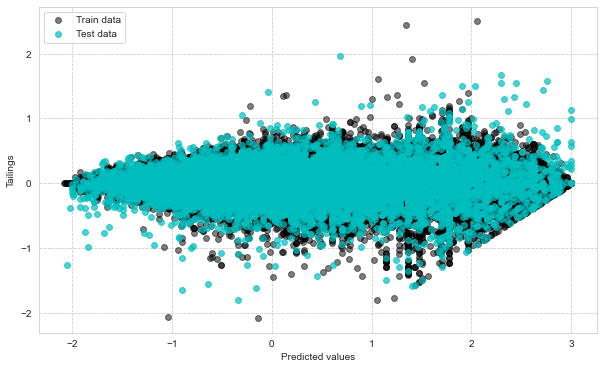

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(yt_pred,yt_pred - y_train,c = 'black', marker = 'o', s = 35, alpha = 0.5,label = 'Train data')
plt.scatter(y_pred,y_pred - y_test, c = 'c', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.show()